In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

In [7]:
print(data)

             id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [9]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [10]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [11]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [12]:
#resultado
print(data)

          id  rated    created_at  last_move_at  turns  victory_status  \
0       9068  False  1.504210e+12  1.504210e+12     13               2   
1      14512   True  1.504130e+12  1.504130e+12     16               3   
2      14904   True  1.504130e+12  1.504130e+12     61               1   
3      14350   True  1.504110e+12  1.504110e+12     61               1   
4       3091   True  1.504030e+12  1.504030e+12     95               1   
...      ...    ...           ...           ...    ...             ...   
20053   4563   True  1.499791e+12  1.499791e+12     24               3   
20054   9954   True  1.499698e+12  1.499699e+12     82               1   
20055  18757   True  1.499698e+12  1.499698e+12     35               1   
20056  11344   True  1.499696e+12  1.499697e+12    109               3   
20057   7145   True  1.499643e+12  1.499644e+12     78               1   

       winner  increment_code  white_id  white_rating  black_id  black_rating  \
0           2             110 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  int64  
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  int64  
 6   winner          20058 non-null  int64  
 7   increment_code  20058 non-null  int64  
 8   white_id        20058 non-null  int64  
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  int64  
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  int64  
 13  opening_eco     20058 non-null  int64  
 14  opening_name    20058 non-null  int64  
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(13)
memory usage: 2.3 MB


In [22]:
# Lectura de Datos
X = data.iloc[:, :16]
y = data.iloc[:, 15]
m = y.size

In [23]:
print(X)
print('*'*25)
print(y)

          id  rated    created_at  last_move_at  turns  victory_status  \
0       9068  False  1.504210e+12  1.504210e+12     13               2   
1      14512   True  1.504130e+12  1.504130e+12     16               3   
2      14904   True  1.504130e+12  1.504130e+12     61               1   
3      14350   True  1.504110e+12  1.504110e+12     61               1   
4       3091   True  1.504030e+12  1.504030e+12     95               1   
...      ...    ...           ...           ...    ...             ...   
20053   4563   True  1.499791e+12  1.499791e+12     24               3   
20054   9954   True  1.499698e+12  1.499699e+12     82               1   
20055  18757   True  1.499698e+12  1.499698e+12     35               1   
20056  11344   True  1.499696e+12  1.499697e+12    109               3   
20057   7145   True  1.499643e+12  1.499644e+12     78               1   

       winner  increment_code  white_id  white_rating  black_id  black_rating  \
0           2             110 

In [24]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [25]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

          id  rated    created_at  last_move_at  turns  victory_status  \
0       9068  False  1.504210e+12  1.504210e+12     13               2   
1      14512   True  1.504130e+12  1.504130e+12     16               3   
2      14904   True  1.504130e+12  1.504130e+12     61               1   
3      14350   True  1.504110e+12  1.504110e+12     61               1   
4       3091   True  1.504030e+12  1.504030e+12     95               1   
...      ...    ...           ...           ...    ...             ...   
20053   4563   True  1.499791e+12  1.499791e+12     24               3   
20054   9954   True  1.499698e+12  1.499699e+12     82               1   
20055  18757   True  1.499698e+12  1.499698e+12     35               1   
20056  11344   True  1.499696e+12  1.499697e+12    109               3   
20057   7145   True  1.499643e+12  1.499644e+12     78               1   

       winner  increment_code  white_id  white_rating  black_id  black_rating  \
0           2             110 

In [26]:
def sigmoid(z):
  #calcula la sigmoide de una entrada z, convierte la entrada a una entrada numpy
  z = np.array(z)
  g = np.zeros(z.shape)
  g = 1/(1+np.exp(-z))
  return g


In [27]:
#prueba para sigmoid
z = 0
g = sigmoid(z)
print ('g(',z,') = ', g)

g( 0 ) =  0.5


In [28]:
# Añade el termino de interseccion a X
m,n = X.shape
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [29]:
print(X)

[[ 1.         -0.08616259 -2.03448366 ...  1.26243922  1.49500186
   0.0654322 ]
 [ 1.          0.90020874  0.49152521 ... -0.8112605  -0.05565041
  -0.29208323]
 [ 1.          0.97123328  0.49152521 ...  0.36032126 -0.29908091
  -0.64959865]
 ...
 [ 1.          1.66933922  0.49152521 ...  1.15699686  0.49693682
  -0.64959865]
 [ 1.          0.32621455  0.49152521 ... -0.72924978  0.08067067
  -0.29208323]
 [ 1.         -0.43458141  0.49152521 ...  1.15699686  0.49693682
  -0.64959865]]


In [30]:
def calcularcosto(theta, X, y,):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot (theta.T))
    J = (1/m) * np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))

    return J


In [31]:
def descensoGradiente(theta , X, y, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha/m)*(h - y).dot(X)

        J_history.append(calcularcosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 2.06853503e+00 -2.60346677e-04 -4.33743847e-03  1.19141477e-01
  1.19144068e-01  6.82674247e-02  8.01579863e-02  2.64104914e-02
 -5.68084080e-02  1.73431910e-02  3.51800429e-01  1.87429132e-02
  3.23592705e-01  1.71081375e-01  6.11023426e-01  5.81152471e-02
  1.33608639e+00]
la cantidad de movimientos (ply) es (usando el descenso por el gradiente): 0.9200


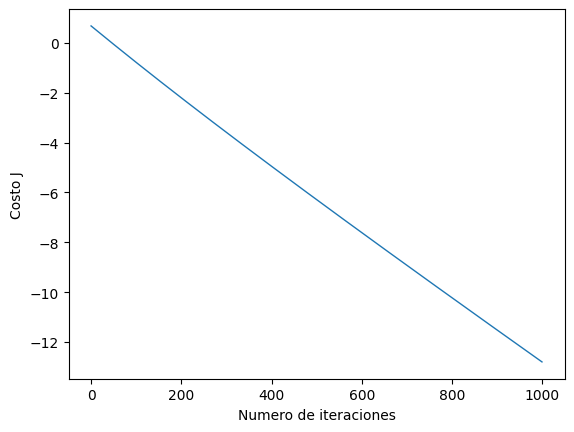

In [45]:
# Elegir algun valor para alpha (probar varias alternativas)
# si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
alpha = 0.0005
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=1)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# cantidad de movimientos (ply)
X_array = [1, -0.066163, -1.034484, 0.922546, 0.742519, -1.113952, -0.647919, 0.779914, -0.219242, -1.239844, -0.631788, -1.603127, -1.466985, -0.805163, 1.362439, 1.695002, 0.165432]
clase= sigmoid(np.dot(theta, X_array))   # Change the order of arguments

print('la cantidad de movimientos (ply) es (usando el descenso por el gradiente): {:.4f}'.format(clase))